In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

# from scipy.stats import binned_statistic_2d
# from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.cm as cm

# from abacusnbody.analysis.tsc import tsc_parallel
import time

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Import packages

sys.path.append('../src/')
# from filter_utils import *
from SZstacker import SZMapStacker # type: ignore
from stacker import SimulationStacker
from loadIO import load_data    
from utils import fft_smoothed_map, gaussian_smoothed_map

# sys.path.append('../../illustrisPython/')
import illustris_python as il # type: ignore

import yaml
import argparse
from pathlib import Path
import glob

In [2]:
stacker = SZMapStacker('TNG300-2', 67, z=0.5,)
# stacker = SZMapStacker('m50n512', 125, z=0.5, simType='SIMBA', feedback='s50')

In [3]:
# nPixels = 261
nPixels = 1070
tau_map = stacker.loadData('tau', nPixels=nPixels, projection='yz', type='map')

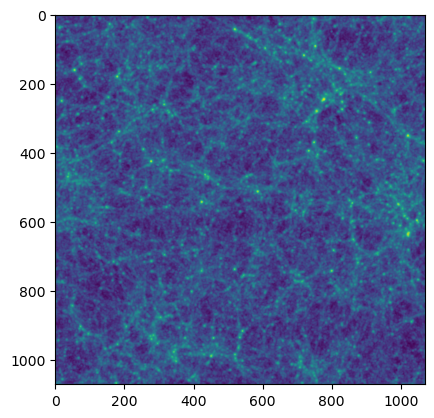

In [4]:
plt.imshow(tau_map, norm='log')
plt.show()

In [5]:
haloes = stacker.loadHalos(stacker.simType)
haloMass = haloes['GroupMass']
haloRad = haloes['GroupRad']
haloPos = haloes['GroupPos']

In [6]:
from halos import select_massive_halos
halo_mask = select_massive_halos(haloMass, 10**(13.22), 5e14)


In [7]:
haloes['GroupMass'] = haloes['GroupMass'][halo_mask]
haloes['GroupRad'] = haloes['GroupRad'][halo_mask] * 3
haloes['GroupPos'] = haloes['GroupPos'][halo_mask]

print(haloes['GroupRad'].shape)

(6305,)


In [8]:
from mapMaker import create_masked_field

masked_tau_map = create_masked_field(stacker, halo_cat=haloes, pType='tau', nPixels=nPixels, projection='yz')

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/abacusutils/main/lib/python3.10/site-packages/abacusnbody/analysis/tsc.py:146: UserWarning: pos.dtype=float64 instead of np.float32. float32 is recommended for performance.
  warnings.warn(
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/abacusutils/main/lib/python3.10/site-packages/abacusnbody/analysis/tsc.py:146: UserWarning: densgrid.dtype=float64 instead of np.float32. float32 is recommended for performance.
  warnings.warn(
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/abacusutils/main/lib/python3.10/site-packages/abacusnbody/analysis/tsc.py:146: UserWarning: weights.dtype=float64 instead of np.float32. float32 is recommended for performance.
  warnings.warn(


Processed 0 snapshots, time elapsed: 21.94 seconds


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/abacusutils/main/lib/python3.10/site-packages/abacusnbody/analysis/tsc.py:146: UserWarning: pos.dtype=float64 instead of np.float32. float32 is recommended for performance.
  warnings.warn(
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/abacusutils/main/lib/python3.10/site-packages/abacusnbody/analysis/tsc.py:146: UserWarning: densgrid.dtype=float64 instead of np.float32. float32 is recommended for performance.
  warnings.warn(
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/abacusutils/main/lib/python3.10/site-packages/abacusnbody/analysis/tsc.py:146: UserWarning: weights.dtype=float64 instead of np.float32. float32 is recommended for performance.
  warnings.warn(


Processed 10 snapshots, time elapsed: 65.51 seconds
Processed 20 snapshots, time elapsed: 97.68 seconds
Processed 30 snapshots, time elapsed: 130.09 seconds
Processed 40 snapshots, time elapsed: 164.15 seconds
Processed 50 snapshots, time elapsed: 196.36 seconds
Processed 60 snapshots, time elapsed: 229.26 seconds
Processed 70 snapshots, time elapsed: 259.54 seconds
Processed 80 snapshots, time elapsed: 290.96 seconds
Processed 90 snapshots, time elapsed: 322.81 seconds
hist2d time: 352.4654302597046


In [9]:
masked_tau_map

array([[3.61631791e-06, 8.62786952e-06, 1.64766505e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.97394426e-06],
       [4.15180759e-06, 1.15790436e-05, 2.07693140e-05, ...,
        0.00000000e+00, 0.00000000e+00, 9.45702090e-07],
       [5.14500155e-06, 1.49895496e-05, 2.09680791e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.60986336e-05, 6.13209354e-05, 2.44835113e-05, ...,
        1.16509243e-05, 1.74485993e-05, 3.09561228e-05],
       [2.63572643e-05, 9.41361089e-06, 1.64803552e-05, ...,
        1.60317775e-05, 1.66246327e-05, 2.37430714e-05],
       [5.42029225e-06, 8.52340179e-06, 1.46763275e-05, ...,
        0.00000000e+00, 0.00000000e+00, 2.32639749e-06]])

In [18]:
np.min(tau_map)

9.795951677860182e-05

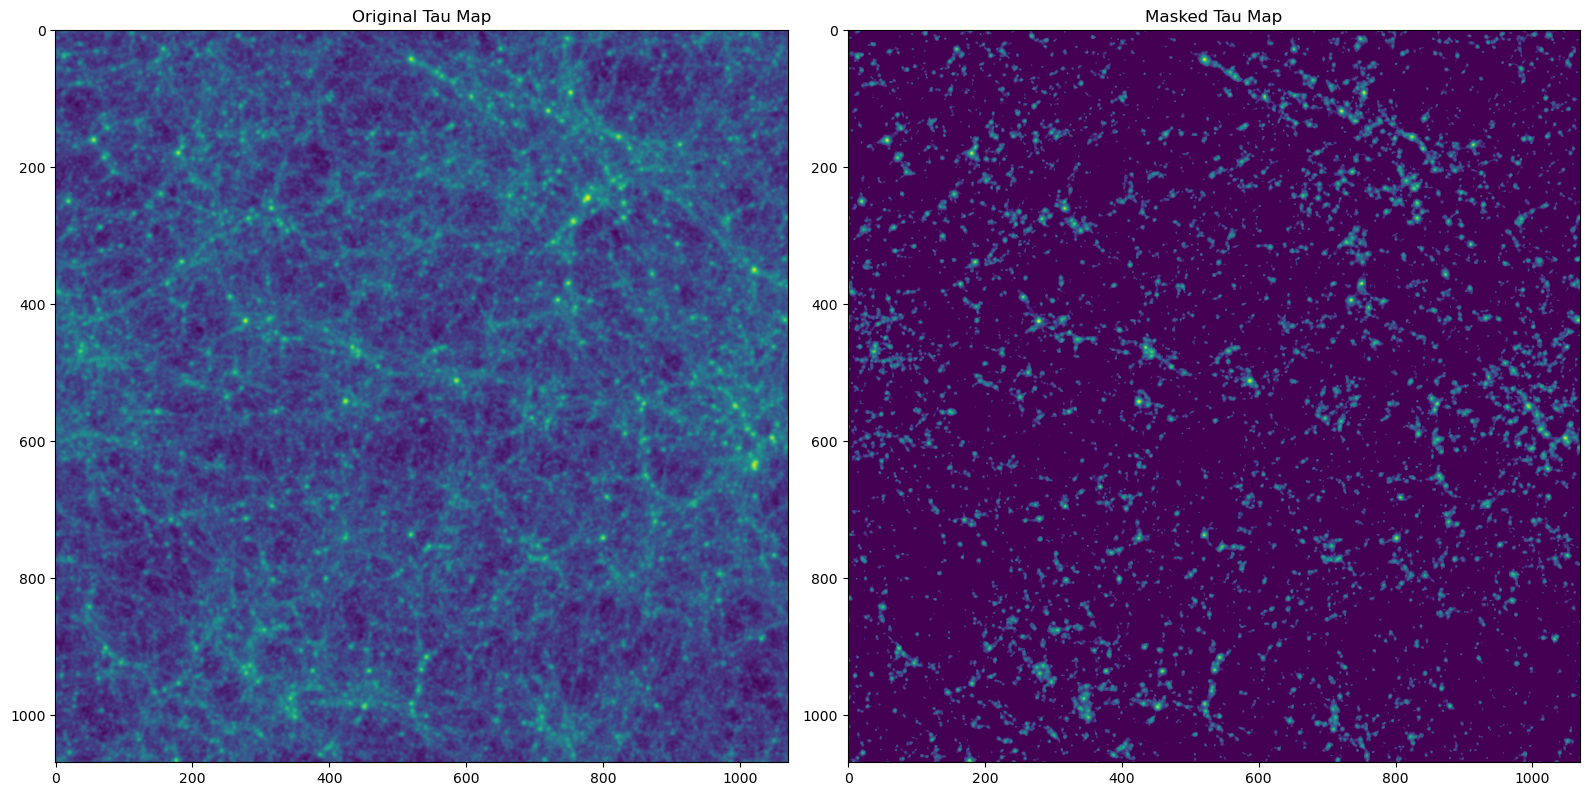

In [21]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
norm = SymLogNorm(linthresh=1e-6, linscale=0.3, vmin=np.min(tau_map), vmax=np.max(tau_map), base=10)

ax[0].imshow(tau_map, norm=norm)
ax[0].set_title('Original Tau Map')

ax[1].imshow(masked_tau_map, norm=norm)
ax[1].set_title('Masked Tau Map')

plt.tight_layout()
# plt.show()
plt.savefig('../figures/2025-09/masked_tau_TNG300.png', dpi=300)

In [11]:
# folderPath = stacker.snapPath(stacker.simType, pathOnly=True)
# snaps = glob.glob(folderPath + 'snap_*.hdf5')
# snap = snaps[0]

In [12]:
# DM_dict = stacker.loadSubset('DM', snapPath=snap, keys=['Coordinates', 'Masses', 'Velocities', 'ParticleIDs'])

# gas_dict = stacker.loadSubset('gas', snapPath=snap, keys=['Coordinates', 'Masses', 'Velocities', 'ElectronAbundance', 'InternalEnergy', 'Density', 'ParticleIDs'])

In [13]:
# DM_dict['ParticleIDs'].shape

In [14]:
# gas_dict['ParticleIDs'].shape

In [15]:
# print(gas_dict['ElectronAbundance'].mean())
# print(np.median(gas_dict['ElectronAbundance']))

In [16]:
# plt.hist(gas_dict['ElectronAbundance'], bins=100)
# plt.yscale('log')
# plt.show()